# 1.0 Introdução 

## 1.1 Problema de Negocio

[House Rocket][HRlink] plataforma de compras e vendas de imoveis.

***Modelo de Negocio:*** Comprar casas com preco baico e revender com o preco mais alto. 

***Desafio***: Encontrar bons negocios dentro do portifolio disponivel, ou seja, encotrar casas com preco baixo, em boa localizacao e que tenham um bom potencial de venda por um preco mais alta.

[HRlink]: https://www.kaggle.com/harlfoxem/housesalesprediction

## 1.2 Perguntas de Negocio. 

1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?
2. Uma vez o imóvel comprado, qual o melhor momento para vende-lo e por qual preço?

## 1.3 Conteudo 

Este Notebook está organu=izado como segue: 
- Dados: Carregamento dos dados
- Transformação: Processamento dos dados. 
- Visualização: Analise exploratoria dos dados. 

# 2.0 Dados

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option("display.max_columns", None)

In [12]:
df_house = pd.read_csv('../data/kc_house_data.csv')

In [13]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- id - ID unico para cada casa. (remover)
- date - Data da casa a venda. (remover)
- price - Preço da cada.
- bedrooms - Número de quartos.
- bathrooms - Número de banheiros, no qual .5 conta como lavabo.
- sqft_living - M2 do espaço interior.
- sqft_lot - M2 do espaço do terreno.
- floors - Número de andares.
- waterfront - Tem vista para o mar (1) ou não (0). (categórico)
- view - Valor de 0 a 4 informando se a vista é boa. (categórico)
- condition - Valor de 1 a 5 sobre a condição da casa. (categórico)
- grade - Nota de 1 a 13, no qual 1-3 pequenas construções, 7 construção e de"sing mediano, e 11-13 para -construções de alto nível.
- sqft_above - M2 do interior da casa, acima do nível do solo.
- sqft_basement - M2 do interior da casa, abaixo do nível do solo.
- yr_built - Ano de construção da casa.
- yrrenovated - Último ano de renovação da casa. (remover)_
- zipcode - CEP da residência. (remover)
- lat - Latitude.
- long - Longitude.
- sqft_living15 - M2 do espaço interno para os 15 vizinhos mais próximos.
- sqft_lot15 - M2 do terreno para os 15 vizinhos mais próximos.

# 3.0 Transformação

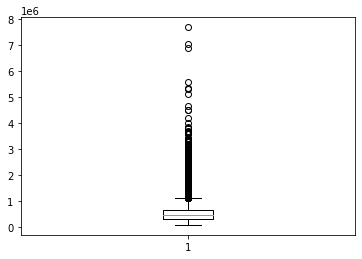

In [22]:
plt.boxplot(df_house['price'])
plt.show()

In [24]:
stats.iqr(df_house['price'])

323050.0

In [30]:
valor = df_house['price']
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
i = q3 - q1 
i

323050.0

In [34]:
limite_inferior = q1 - 3*i
limite_superior = q3 + 3*i

In [35]:
limite_superior

1614150.0

## H1. Imoveis que possuem vista para agua sao 20% mais caros na media.  